# PROYECTO 2 EVALUACIÓN FORMATIVA

## Esteban Osejo y Carlos Paredes

## Importación de librerías

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

## Importación de datos

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/chrisrueda/EndomorfismoII_2024/main/PROYECTOS/SEGUNDO%20PARCIAL/mora_cdto.csv')


# PREPARACIÓN DE DATOS

##Comprobar los valores y la cantidad

## Es importante verificar los datos del data set. ¿Cantidad total de valores?, ¿tipo de valores que contiene?, ¿le hace faltan valores o no?, ¿existen valores adicionales que son irrelevantes?


In [5]:
columnas = df.columns
for columna in columnas:
    print(columna + ":")
    val_ca = df[columna].unique()
    print("Valores únicos:", val_ca)
    print("Cantidad total de valores:", df[columna].count())
    print()

ID:
Valores únicos: [    1     2     3 ... 29998 29999 30000]
Cantidad total de valores: 30000

CU:
Valores únicos: [  2000  12000   9000   5000  50000  10000  14000  20000  26000  63000
   7000  25000  32000  36000  18000  13000  45000   6000  23000  16000
  28000   1000   4000  21000  15000  38000  31000  40000   8000  29000
  34000  30000   3000  24000  47000  48000  35000  33000  11000  42000
  17000  37000  27000  22000  19000  51000  46000  44000  41000  49000
  39000  58000  60000  62000  61000  70000  67000  68000  43000  55000
  54000 100000  53000  71000  56000  52000  75000  64000   1600  57000
  59000  66000  72000  32768  74000  80000  76000  69000  65000  78000
  73000]
Cantidad total de valores: 30000

G:
Valores únicos: ['F' 'M' 'O' nan]
Cantidad total de valores: 29997

ED:
Valores únicos: [2 1 3 5 4 6 0]
Cantidad total de valores: 30000

EC:
Valores únicos: ['Casado' 'Soltero' 'Otros' nan '0']
Cantidad total de valores: 29999

E:
Valores únicos: [24 26 34 37 57 29 23 

## Reemplazar los valores que son inadecuados en las características



In [6]:
# Eliminar la columna "ID"
df.drop("ID", axis=1, inplace=True)

# ED sólo puede tener valores entre 1 y 4 pero tiene valores únicos: [2 1 3 5 4 6 0] entonces se eliminan los 0, 5 y 6
df["ED"] = df["ED"].replace({'0': np.nan, '5': np.nan, '6': np.nan})

# Estado Civil solo puede tener 3 valores pero tiene  valores únicos: Valores únicos: ['Casado' 'Soltero' 'Otros' nan '0'] el 0 no se incluye
df["EC"] = df["EC"].replace("0", np.nan)

# M1-M6 => datos normales son -1, 1 a 9 se aplica el siguiente filtro para eliminar los datos fuera de este rango permitido
# Definir el rango permitido
rango_permitido = list(range(1, 9)) + [-1]

# Iterar sobre las columnas M1 a M6
for columna in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6']:
    # Seleccionar las filas que están dentro del rango permitido
    # Se genera un vector con índices permitidos que se crea con la función isin
    # Indica los índices permitidos
    indices_permitidos = df[columna].isin(rango_permitido)

    # Reemplazar los valores que están fuera del rango por NaN
    # Con la función loc se eliminan todos los índices que no son permitidos
    # Todos los índices que no son permitidos (índices negados) se los convierte en tipo NaN para todas las columnas
    df.loc[~indices_permitidos, columna] = np.nan

##Codificar los valores tipo etiquetas


## Convertir todas las columnas categóricas de un DataFrame de pandas en formatos numéricos adecuados y considerar cuidadosamente los valores NaN durante el proceso

In [7]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Iterar sobre todas las columnas del DataFrame
for columna in df.columns:
    # Verificar si la columna contiene datos no numéricos
    if df[columna].dtype == 'object':
        # Guardar los índices de los valores NaN
        indices_nan = df[columna].isnull()

        # Ajustar y transformar la columna usando LabelEncoder
        df[columna] = label_encoder.fit_transform(df[columna].astype(str))

        # Reemplazar los valores NaN que fueron codificados por NaN nuevamente
        df[columna] = df[columna].where(~indices_nan, np.nan)

        # Imprimir los valores únicos codificados después de la codificación
        print(columna + ":")
        print("Valores únicos codificados:", df[columna].unique())
        print()

G:
Valores únicos codificados: [ 0.  1.  2. nan]

EC:
Valores únicos codificados: [ 0.  2.  1. nan]

SP:
Valores únicos codificados: [1 0]



## Comprobar los valores y la cantidad, luego de eliminar los valores fuera de rango y codificar las etiquetas

In [8]:
columnas = df.columns

for columna in columnas:
    print(columna + ":")
    val_ca = df[columna].unique()
    print("Valores únicos:", val_ca)
    print("Cantidad total de valores:", df[columna].count())
    print()

CU:
Valores únicos: [  2000  12000   9000   5000  50000  10000  14000  20000  26000  63000
   7000  25000  32000  36000  18000  13000  45000   6000  23000  16000
  28000   1000   4000  21000  15000  38000  31000  40000   8000  29000
  34000  30000   3000  24000  47000  48000  35000  33000  11000  42000
  17000  37000  27000  22000  19000  51000  46000  44000  41000  49000
  39000  58000  60000  62000  61000  70000  67000  68000  43000  55000
  54000 100000  53000  71000  56000  52000  75000  64000   1600  57000
  59000  66000  72000  32768  74000  80000  76000  69000  65000  78000
  73000]
Cantidad total de valores: 30000

G:
Valores únicos: [ 0.  1.  2. nan]
Cantidad total de valores: 29997

ED:
Valores únicos: [2 1 3 5 4 6 0]
Cantidad total de valores: 30000

EC:
Valores únicos: [ 0.  2.  1. nan]
Cantidad total de valores: 29946

E:
Valores únicos: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 

# Existen datos NaN por lo que se aplica una imputación

In [9]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df= imputer.fit_transform(df)

##Función para calcular las métricas

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score

def evalua_modelo(model, X_test, y_test):
    # Realizar predicciones con el modelo
    y_pred = model.predict(X_test)

    # Calcular la matriz de confusión
    mc = confusion_matrix(y_test, y_pred)

    # Calcular métricas de evaluación
    vn, fp, fn, vp = mc.ravel()
    exact = (vp+vn)/(vp+vn+fp+fn)
    precision = vp / (vp + fp)
    sensitivity = vp / (vp + fn)
    specificity = vn / (vn + fp)
    f1 = f1_score(y_test, y_pred)

    # Imprimir métricas
    print(f"Exactitud (Accuracy): {exact:.2f}")
    print(f"Precisión (Precision): {precision:.2f}")
    print(f"Sensibilidad (Sensitivity): {sensitivity:.2f}")
    print(f"Especificidad (Specificity): {specificity:.2f}")
    print(f"f1 (f1-score): {f1:.2f}")

    # Mostrar la matriz de confusión
    plt.figure(figsize=(8,6))
    sns.heatmap(mc, annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
    plt.xlabel("Variables predichas")
    plt.ylabel("Verdad Terreno")
    plt.show()
    return [exact, precision, sensitivity, specificity, f1]


## Con datos tipo Numpy se trabaja con matrices normales

In [11]:
# Matriz de entrada
X = df[:,0:-1]
# Vector y de salida
y = df[:,-1]

# Generar nuestro conjunto de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

Exactitud (Accuracy): 0.81
Precisión (Precision): 0.64
Sensibilidad (Sensitivity): 0.30
Especificidad (Specificity): 0.95
f1 (f1-score): 0.41


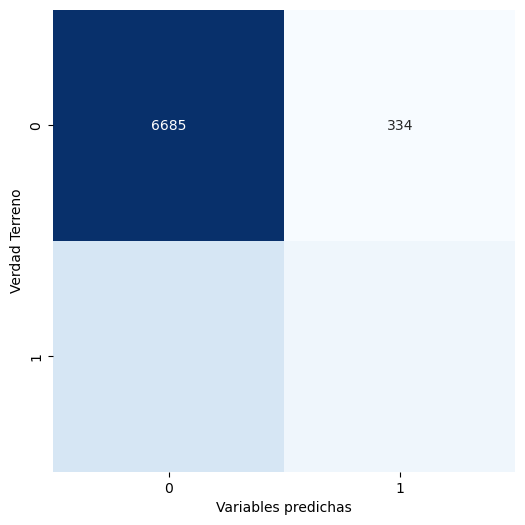

[0.8086666666666666, 0.639697950377562, 0.29934376577486116, 0.9524148739136629, 0.4078404401650619]


In [12]:
# Crear el modelo
modelo_rf = RandomForestClassifier()
# Entrenar el modelo
modelo_rf.fit(X_train, y_train)
# Utiliza la función con tu modelo y datos de prueba
metrics_RandomForest = evalua_modelo(modelo_rf, X_test, y_test)
print(metrics_RandomForest)

16 2 2 0
El mejor modelo tuvo las siguientes métricas 81.26666666666667%
Exactitud (Accuracy): 0.81
Precisión (Precision): 0.67
Sensibilidad (Sensitivity): 0.29
Especificidad (Specificity): 0.96
f1 (f1-score): 0.40


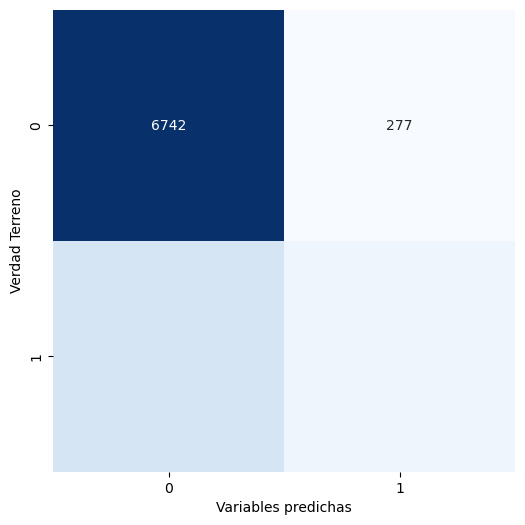

[0.8126666666666666, 0.673733804475854, 0.2887430590610803, 0.9605356888445648, 0.4042402826855124]


In [13]:
max_depths = [13,14,15,16,17]
min_samples_splits = [2,3]
min_samples_leafs = [1, 2,3,4]
alphas = [ 0, 0.01]

resultado = []  # Lista para almacenar los resultados

for max_dep in max_depths:
    for min_samples_split in min_samples_splits:
        for min_leaf in min_samples_leafs:
            for alpha in alphas:
                modelo = RandomForestClassifier(max_depth=max_dep,
                                                min_samples_split=min_samples_split,
                                                min_samples_leaf=min_leaf,
                                                n_estimators=100,
                                                random_state=42)
                modelo.fit(X_train, y_train)
                y_pred = modelo.predict(X_test)
                exactitud = accuracy_score(y_test, y_pred)
                resultado.append((max_dep, min_samples_split, min_leaf, alpha, exactitud))

mejores_param = max(resultado, key=lambda item: item[-1])

print(mejores_param[0], mejores_param[1], mejores_param[2], mejores_param[3])
# Entrenar nuestro mejor modelo
mejor_modelo_random_forest = RandomForestClassifier(max_depth=mejores_param[0],
                                       min_samples_split=mejores_param[1],
                                       min_samples_leaf=mejores_param[2],
                                       n_estimators=100,
                                       random_state=42)

mejor_modelo_random_forest.fit(X_train, y_train)
# Validar nuestro mejor modelo
y_hat = mejor_modelo_random_forest.predict(X_test)
# Para validar los mejores parámetros obtenidos se evalúa de nuevo el modelo con los mismos valores de prueba
# y se imprime el porcentaje de exactitud.
m_exactitud = accuracy_score(y_test, y_hat)
print(f'El mejor modelo tuvo las siguientes métricas {100*m_exactitud}%')
metrics_RandomForest_SINTONIZADO = evalua_modelo(mejor_modelo_random_forest, X_test, y_test)
print(metrics_RandomForest_SINTONIZADO)

In [17]:
import pickle
# save the model to disk
filename = 'model_val.sav'
pickle.dump(mejor_modelo_random_forest, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8126666666666666


In [19]:
# Ver archivo de validación
data = pd.read_csv('/mnt/c/Documents and Settings/christianr/Documents/GitHub/EndomorfismoII_2024/PROYECTOS/SEGUNDO PARCIAL/submissions/data_validation.csv')

data.head()
# Definición de conjunto de datos X e y

# Matriz de entrada
X = data.drop('SP', axis=1)
X = X.drop('G', axis=1)
# Vector de salida
y = data['SP']

# Predecir con el modelo
y_pred = mejor_modelo_random_forest.predict(X) 

from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y, y_pred)

print(f'La exactitud del modelo entrenado es: {exactitud:.2f}')


La exactitud del modelo entrenado es: 0.77


/home/christianr/anaconda3/envs/dias/lib/python3.9/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Exactitud (Accuracy): 0.81
Precisión (Precision): 0.61
Sensibilidad (Sensitivity): 0.33
Especificidad (Specificity): 0.94
f1 (f1-score): 0.43


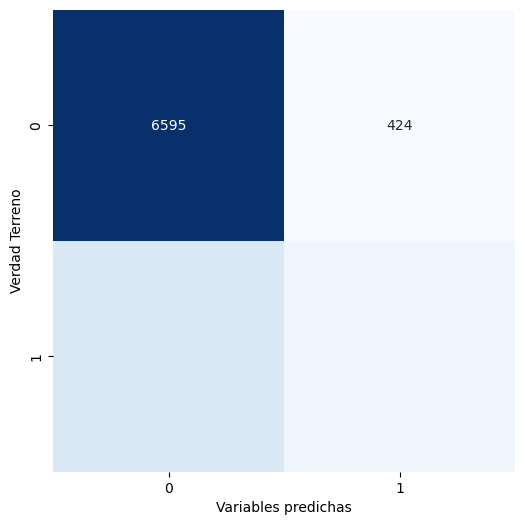

[0.8051111111111111, 0.6055813953488373, 0.3286219081272085, 0.9395925345490811, 0.4260471204188482]


In [15]:
from xgboost import XGBClassifier
# Entrenar el modelo XGBoost
model = XGBClassifier()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular METRICAS
metrics_XGB = evalua_modelo(model, X_test, y_test)
print(metrics_XGB)

In [16]:
max_depths = [None,1,3]
min_samples_splits = [2, 3, 4]
min_samples_leafs = [ 4, 5, 6]
alphas = [ 0, 0.02, 0.01]

resultado = []  # Lista para almacenar los resultados

for max_dep in max_depths:
    for min_samples_split in min_samples_splits:
        for min_leaf in min_samples_leafs:
            for alpha in alphas:
                modelo = XGBClassifier(max_depth=max_dep,
                                       min_child_weight=min_samples_split,
                                       min_split_loss=min_leaf,
                                       reg_alpha=alpha,
                                       random_state=42)
                modelo.fit(X_train, y_train)
                y_pred = modelo.predict(X_test)
                exactitud = accuracy_score(y_test, y_pred)
                resultado.append((max_dep, min_samples_split, min_leaf, alpha, exactitud))

mejores_param = max(resultado, key=lambda item: item[-1])

print(mejores_param[0], mejores_param[1], mejores_param[2], mejores_param[3])
# Entrenar nuestro mejor modelo
mejor_modelo = XGBClassifier(max_depth=mejores_param[0],
                              min_child_weight=mejores_param[1],
                              min_split_loss=mejores_param[2],
                              reg_alpha=mejores_param[3],
                              random_state=42)

mejor_modelo.fit(X_train, y_train)
# Validar nuestro mejor modelo
y_hat = mejor_modelo.predict(X_test)
# Para validar los mejores parámetros obtenidos se evalúa de nuevo el modelo con los mismos valores de prueba
# y se imprime el porcentaje de exactitud.
m_exactitud = accuracy_score(y_test, y_hat)
# Calcular METRICAS
metrics_XGB_SINTONIZADO = evalua_modelo(mejor_modelo, X_test, y_test)
print(metrics_XGB_SINTONIZADO )

KeyboardInterrupt: 

In [ ]:
# Crear una lista con los nombres de los modelos
model_names = ['XGBoost', 'Random Forest', 'XGBoost SINTONIZADO', 'Random Forest SINTONIZADO'  ]

# Crear un diccionario con las métricas de cada modelo
metrics_dict = {
    'Model': model_names,
    'Accuracy': [metrics_XGB[0], metrics_RandomForest[0], metrics_XGB_SINTONIZADO[0], metrics_RandomForest_SINTONIZADO[0]],
    'Precision': [metrics_XGB[1], metrics_RandomForest[1], metrics_XGB_SINTONIZADO[1], metrics_RandomForest_SINTONIZADO[1]],
    'Sensitivity': [metrics_XGB[2], metrics_RandomForest[2], metrics_XGB_SINTONIZADO[2], metrics_RandomForest_SINTONIZADO[2]],
    'Specificity': [metrics_XGB[3], metrics_RandomForest[3], metrics_XGB_SINTONIZADO[3], metrics_RandomForest_SINTONIZADO[3]],
    'F1':[metrics_XGB[4], metrics_RandomForest[4],metrics_XGB_SINTONIZADO[4], metrics_RandomForest_SINTONIZADO[4]],
}

# Crear el DataFrame y mostrar la tabla
metrics_table = pd.DataFrame(metrics_dict)
print(metrics_table)

                       Model  Accuracy  Precision  Sensitivity  Specificity  \
0                    XGBoost  0.805111   0.605581     0.328622     0.939593   
1              Random Forest  0.806889   0.625907     0.304897     0.948568   
2        XGBoost SINTONIZADO  0.812444   0.672963     0.287733     0.960536   
3  Random Forest SINTONIZADO  0.812667   0.673734     0.288743     0.960536   

         F1  
0  0.426047  
1  0.410048  
2  0.403112  
3  0.404240  
